## 1). Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## 2).Loading DataSet

In [2]:
df= pd.read_csv("50_Startups.csv")
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## 3)- Normalizing DataSet

In [4]:
 le = LabelEncoder()
 df["State"] = le.fit_transform(df["State"])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


## 4). Spleting Datatset (Train & Test)

In [5]:
X= df[["R&D Spend","Administration","Marketing Spend","State"]]
y= df["Profit"]
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

<AxesSubplot:xlabel='State', ylabel='Profit'>

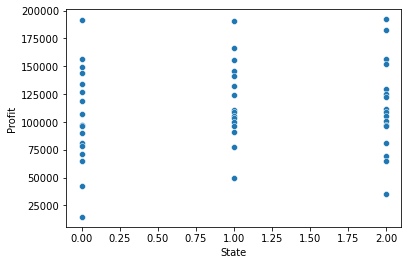

In [6]:
# df.corr()
# fig, ax = plt.subplots(figsize=(15,10))
# sns.heatmap(df.corr(),cmap=sns.diverging_palette(0, 230, 90, 60, as_cmap=True),linewidth=0.3, annot=True, fmt='.2f', )

sns.scatterplot(x="State", y="Profit", data=df)

## 5).Creating Model 

### - Linear Model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(x_test)

eval_metrics = pd.DataFrame(data=[mean_squared_error(y_test, predictions),
                                  mean_absolute_error(y_test, predictions),
                                  r2_score(y_test, predictions)],
                                  columns=["Linear Model"], 
                                  index=["MSE","MAE","R2"])
eval_metrics

,Linear Model
MSE,1.684360e+08
MAE,8.636597e+03
R2,9.104677e-01


### - Polynomial Model

In [8]:
poly_ftr_d2 = PolynomialFeatures(degree = 2)

X_train_d2 = poly_ftr_d2.fit_transform(X_train)
X_test_d2 = poly_ftr_d2.fit_transform(x_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_d2, y_train)

y_pred_d2 = poly_reg.predict(X_test_d2)
MSE_d2 = mean_squared_error(y_test, y_pred_d2)
MAE_d2 = mean_absolute_error(y_test, y_pred_d2)
R2_d2 = r2_score(y_test, y_pred_d2)

eval_metrics = pd.DataFrame(data=[MSE_d2 ,MAE_d2, R2_d2], columns=["d=2"], index=["MSE_d2","MAE_d2","R2_d2"])
eval_metrics

,d=2
MSE_d2,1.914739e+08
MAE_d2,1.143546e+04
R2_d2,8.982219e-01


In [9]:
poly_ftr_d5 = PolynomialFeatures(degree = 5)

X_train_d5 = poly_ftr_d5.fit_transform(X_train)
X_test_d5 = poly_ftr_d5.fit_transform(x_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_d5, y_train)

y_pred_d5 = poly_reg.predict(X_test_d5)
MSE_d5 = mean_squared_error(y_test, y_pred_d5)
MAE_d5 = mean_absolute_error(y_test, y_pred_d5)
R2_d5 = r2_score(y_test, y_pred_d5)

eval_metrics = pd.DataFrame(data=[MSE_d5 ,MAE_d5, R2_d5], columns=["d=5"], index=["MSE_d5","MAE_d5","R2_d5"])
eval_metrics

,d=5
MSE_d5,9.083582e+12
MAE_d5,9.629129e+05
R2_d5,-4.827387e+03


## 6). Comparing Predictive values with target values

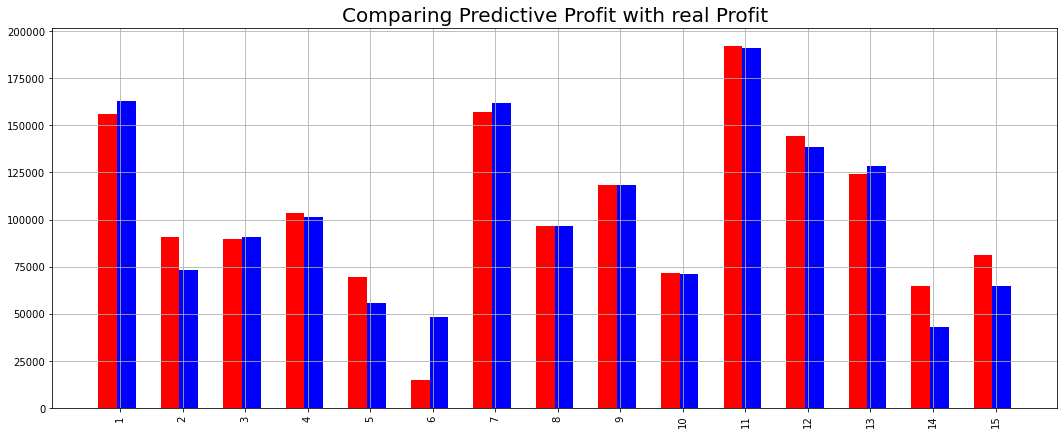

In [10]:
plt.rcParams['figure.figsize'] = (18, 7)
S=np.arange(len(predictions))
plt.bar(S, y_test, 0.3, color="red")
plt.bar(S+0.3,predictions,0.3, color="blue")
plt.title('Comparing Predictive Profit with real Profit', fontsize = 20)
plt.xticks(S+0.2, S+1, rotation = 90 )
plt.grid()
plt.show()